# FIFA 2018 Man of the Match

Dataset: https://www.kaggle.com/mathan/fifa-2018-match-statistics

Task:
- Train a binary classifier to predict whether a player wins man of the match
- Find clusters of matches in the data

In [6]:
import pandas as pd

df = pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/03_TextImage/FIFA 2018 Statistics.csv')
df.drop('Date', inplace=True, axis=1) # not using Date
df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [7]:
# randomly reserve 5 entries for predictions
# include 2 positive, 3 negative

df_predict_0 = df.loc[df['Man of the Match'] == 'No'].sample(n=3, random_state=42)
df_predict_1 = df.loc[df['Man of the Match'] == 'Yes'].sample(n=2, random_state=42)

df_predict = pd.concat([df_predict_0, df_predict_1])
df.drop(df_predict.index, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 127
Data columns (total 26 columns):
Team                      123 non-null object
Opponent                  123 non-null object
Goal Scored               123 non-null int64
Ball Possession %         123 non-null int64
Attempts                  123 non-null int64
On-Target                 123 non-null int64
Off-Target                123 non-null int64
Blocked                   123 non-null int64
Corners                   123 non-null int64
Offsides                  123 non-null int64
Free Kicks                123 non-null int64
Saves                     123 non-null int64
Pass Accuracy %           123 non-null int64
Passes                    123 non-null int64
Distance Covered (Kms)    123 non-null int64
Fouls Committed           123 non-null int64
Yellow Card               123 non-null int64
Yellow & Red              123 non-null int64
Red                       123 non-null int64
Man of the Match          123 non-null

In [9]:
import matplotlib.pyplot as plt

# plot a histogram of the features
df.hist(figsize=(15, 15))
plt.show()

<Figure size 1500x1500 with 25 Axes>

In [10]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 105 to 117
Data columns (total 26 columns):
Team                      5 non-null object
Opponent                  5 non-null object
Goal Scored               5 non-null int64
Ball Possession %         5 non-null int64
Attempts                  5 non-null int64
On-Target                 5 non-null int64
Off-Target                5 non-null int64
Blocked                   5 non-null int64
Corners                   5 non-null int64
Offsides                  5 non-null int64
Free Kicks                5 non-null int64
Saves                     5 non-null int64
Pass Accuracy %           5 non-null int64
Passes                    5 non-null int64
Distance Covered (Kms)    5 non-null int64
Fouls Committed           5 non-null int64
Yellow Card               5 non-null int64
Yellow & Red              5 non-null int64
Red                       5 non-null int64
Man of the Match          5 non-null object
1st Goal                  2 non-

### Data Transformation

In [11]:
for c in df.columns:
    print(c, df[c].unique())

Team ['Russia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal' 'Spain' 'France'
 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark' 'Croatia' 'Nigeria'
 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil' 'Switzerland' 'Sweden'
 'Korea Republic' 'Belgium' 'Panama' 'Tunisia' 'England' 'Colombia'
 'Japan' 'Poland' 'Senegal' 'Saudi Arabia']
Opponent ['Saudi Arabia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain' 'Portugal'
 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru' 'Nigeria'
 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany' 'Switzerland' 'Brazil'
 'Korea Republic' 'Sweden' 'Panama' 'Belgium' 'England' 'Tunisia' 'Japan'
 'Colombia' 'Senegal' 'Poland' 'Russia']
Goal Scored [5 0 1 3 2 6 4]
Ball Possession % [40 43 57 64 36 39 61 51 49 72 28 52 48 54 46 50 60 41 59 47 53 30 70 44
 56 58 42 66 34 71 29 45 55 68 32 38 62 65 35 75 25 37 63]
Attempts [13  8 14 12  4 26  9 18 10 11 25 20  6 15  5 17 16 23  7  3 22 19 24]
On-Target [ 7  3  4  2  5  1  6  9  0 12  8]
Off-Target [ 3  6  5 

Non-numeric columns:

```
Team                      128 non-null object -> Label Encode
Opponent                  128 non-null object -> Label Encode
Man of the Match          128 non-null object -> Label Encode
Round                     128 non-null object -> Label Encode
PSO                       128 non-null object -> Label Encode
```

In [12]:
from sklearn.preprocessing import LabelEncoder

encoders = dict() # store our encoders for use during prediction

for c in ['Team', 'Opponent', 'Man of the Match', 'Round', 'PSO']:
    encoders[c] = LabelEncoder()
    df[c] = encoders[c].fit_transform(df[c])

Columns with missing values:

```
1st Goal                  94 non-null float64 -> replace NaN with -1
Own goals                 12 non-null float64 -> replace NaN with 0
Own goal Time             12 non-null float64 -> replace NaN with -1
```

In [13]:
df['1st Goal'].fillna(-1, inplace=True)

df['Own goals'].fillna(0, inplace=True)

df['Own goal Time'].fillna(-1, inplace=True)

In [14]:
# check that all rows have numeric entries (we will skip date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 127
Data columns (total 26 columns):
Team                      123 non-null int64
Opponent                  123 non-null int64
Goal Scored               123 non-null int64
Ball Possession %         123 non-null int64
Attempts                  123 non-null int64
On-Target                 123 non-null int64
Off-Target                123 non-null int64
Blocked                   123 non-null int64
Corners                   123 non-null int64
Offsides                  123 non-null int64
Free Kicks                123 non-null int64
Saves                     123 non-null int64
Pass Accuracy %           123 non-null int64
Passes                    123 non-null int64
Distance Covered (Kms)    123 non-null int64
Fouls Committed           123 non-null int64
Yellow Card               123 non-null int64
Yellow & Red              123 non-null int64
Red                       123 non-null int64
Man of the Match          123 non-null i

## Visualization

In [2]:
import seaborn as sns

sns.pairplot(df, hue='Man of the Match')

# double click to enlarge

ModuleNotFoundError: No module named 'seaborn'

In [1]:
import seaborn as sns

columns = [
    'Ball Possession %',
    'Attempts',
    'On-Target',
    'Off-Target',
    'Blocked',
    'Corners',
    'Offsides',
    'Free Kicks',
    'Saves',
    'Pass Accuracy %',
    'Passes',
    'Distance Covered (Kms)',
    'Fouls Committed',
    'Yellow Card',
    'Red',
    '1st Goal',
    'Man of the Match'
]

sns.pairplot(df[columns], hue='Man of the Match')

ModuleNotFoundError: No module named 'seaborn'

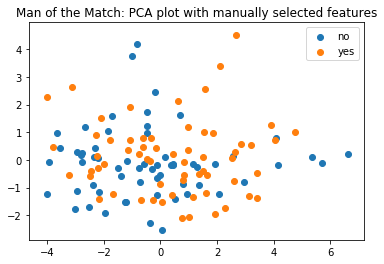

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

columns.remove('Man of the Match')
X = df.loc[:, columns]
X_scaled = StandardScaler().fit_transform(X)

y = df['Man of the Match']
X_2d = PCA(n_components=2).fit_transform(X_scaled)

fig, ax = plt.subplots()
ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], label='no')
ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], label='yes')
ax.legend()
ax.set(title='Man of the Match: PCA plot with manually selected features')
plt.show()

### Programmatic Feature Selection

Instead of (or in addition to) staring at plots, we can use sklearn to select features programmatically, using statistical tests.

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

```
sklearn.feature_selection.SelectKBest(score_func=<function f_classif>, k=10)

f_classif: ANOVA F-value between label/feature for classification tasks.
mutual_info_classif: Mutual information for a discrete target.
chi2: Chi-squared stats of non-negative features for classification tasks.
f_regression: F-value between label/feature for regression tasks.
mutual_info_regression: Mutual information for a continuous target.
```

In [18]:
from sklearn.feature_selection import SelectKBest
SelectKBest?

In [19]:
# Apply feature selection using statistics
from sklearn.feature_selection import f_classif

# for K-best, we specify the number of features we want
X_all = df.loc[:, df.columns != 'Man of the Match']
print(X_all.columns)

print('Before', X_all.shape)

# let's say, we want 5 features
selector = SelectKBest(f_classif, k=5)
X_kbest = selector.fit_transform(X_all, y)
print('After', X_kbest.shape)

# which columns are selected?
print('Support', selector.get_support())
print(X_all.columns[selector.get_support()])

Index(['Team', 'Opponent', 'Goal Scored', 'Ball Possession %', 'Attempts',
       'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', '1st Goal', 'Round', 'PSO', 'Goals in PSO',
       'Own goals', 'Own goal Time'],
      dtype='object')
Before (123, 25)
After (123, 5)
Support [False False  True False  True  True False False  True False False False
 False False False False False False False  True False False False False
 False]
Index(['Goal Scored', 'Attempts', 'On-Target', 'Corners', '1st Goal'], dtype='object')


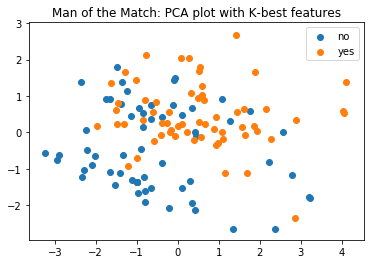

In [23]:
X_scaled = StandardScaler().fit_transform(X_kbest)

X_2d = PCA(n_components=2).fit_transform(X_scaled)

fig, ax = plt.subplots()
ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], label='no')
ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], label='yes')
ax.set(title='Man of the Match: PCA plot with K-best features')
ax.legend()
plt.show()

In [24]:
from sklearn.feature_selection import SelectPercentile

SelectPercentile?

In [25]:
print('Before', X_all.shape)

# let's say, we want top 25% of features
selector2 = SelectPercentile(f_classif, percentile=25)
X_percentile = selector2.fit_transform(X_all, y)
print('After', X_percentile.shape)

# which columns are selected?
print('Support', selector2.get_support())
print(X_all.columns[selector2.get_support()])

Before (123, 25)
After (123, 6)
Support [False False  True False  True  True False False  True False False False
 False False False False  True False False  True False False False False
 False]
Index(['Goal Scored', 'Attempts', 'On-Target', 'Corners', 'Yellow Card',
       '1st Goal'],
      dtype='object')


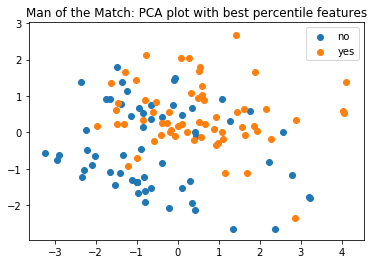

In [26]:
X_scaled = StandardScaler().fit_transform(X_kbest)

X_2d = PCA(n_components=2).fit_transform(X_scaled)

fig, ax = plt.subplots()
ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], label='no')
ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], label='yes')
ax.set(title='Man of the Match: PCA plot with best percentile features')
ax.legend()
plt.show()

## Training

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, random_state=42)

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<class 'sklearn.dummy.DummyClassifier'>
             precision    recall  f1-score   support

          0       0.47      0.62      0.53        13
          1       0.64      0.50      0.56        18

avg / total       0.57      0.55      0.55        31

AUC 0.4572649572649573
<class 'sklearn.linear_model.logistic.LogisticRegression'>
             precision    recall  f1-score   support

          0       0.60      0.92      0.73        13
          1       0.91      0.56      0.69        18

avg / total       0.78      0.71      0.71        31

AUC 0.8760683760683761
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
             precision    recall  f1-score   support

          0       0.59      0.77      0.67        13
          1       0.79      0.61      0.69        18

avg / total       0.70      0.68      0.68        31

AUC 0.7692307692307693
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
             precision    recall  f1-score   support

          0       

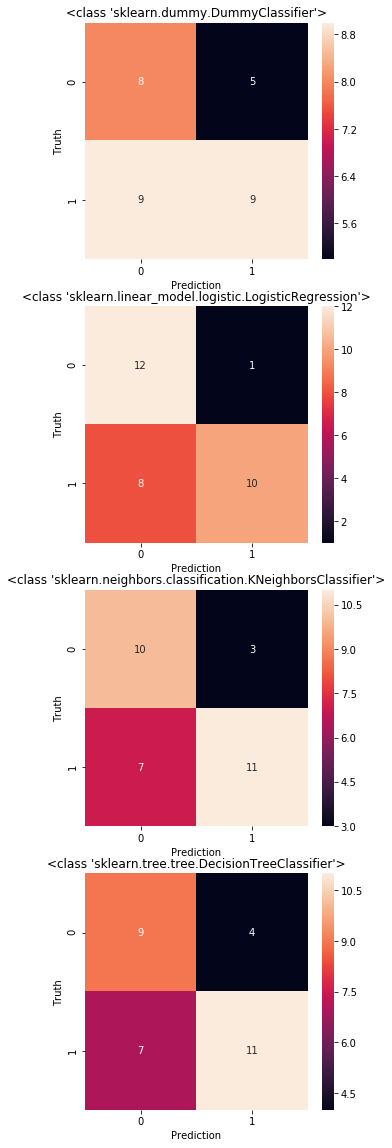

In [30]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
    roc_auc_score

classifiers = [
    DummyClassifier(),
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=42)
]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
axes = axes.flatten()
y_scores = []

for clf, ax in zip(classifiers, axes):
    clf.fit(X_train_scaled, y_train)
    pred = clf.predict(X_test_scaled)
    
    if hasattr(clf, 'decision_function'):
        prob = clf.decision_function(X_test_scaled)
    else:
        prob = clf.predict_proba(X_test_scaled)[:, 1] # positive label=1
    y_scores.append(prob)

    print(clf.__class__)
    print(classification_report(y_test, pred))
    print('AUC', roc_auc_score(y_test, prob))
    
    sns.heatmap(confusion_matrix(y_test, pred),
                annot=True, ax=ax, fmt='d')
    ax.set(xlabel='Prediction', ylabel='Truth', title=clf.__class__); 

{'C': 1, 'gamma': 0.1}
             precision    recall  f1-score   support

          0       0.67      0.77      0.71        13
          1       0.81      0.72      0.76        18

avg / total       0.75      0.74      0.74        31

AUC 0.829059829059829


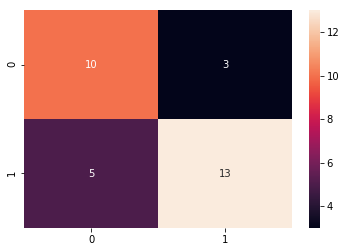

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gs = GridSearchCV(SVC(random_state=42),
                  param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [1e-3, 1e-2, 1e-1, 1, 10]})
gs.fit(X_train_scaled, y_train)

pred = gs.predict(X_test_scaled)
prob = gs.decision_function(X_test_scaled)
y_scores.append(prob)
classifiers.append(gs)

print(gs.best_params_)
print(classification_report(y_test, pred))
print('AUC', roc_auc_score(y_test, prob))

sns.heatmap(confusion_matrix(y_test, pred),
            annot=True, fmt='d')

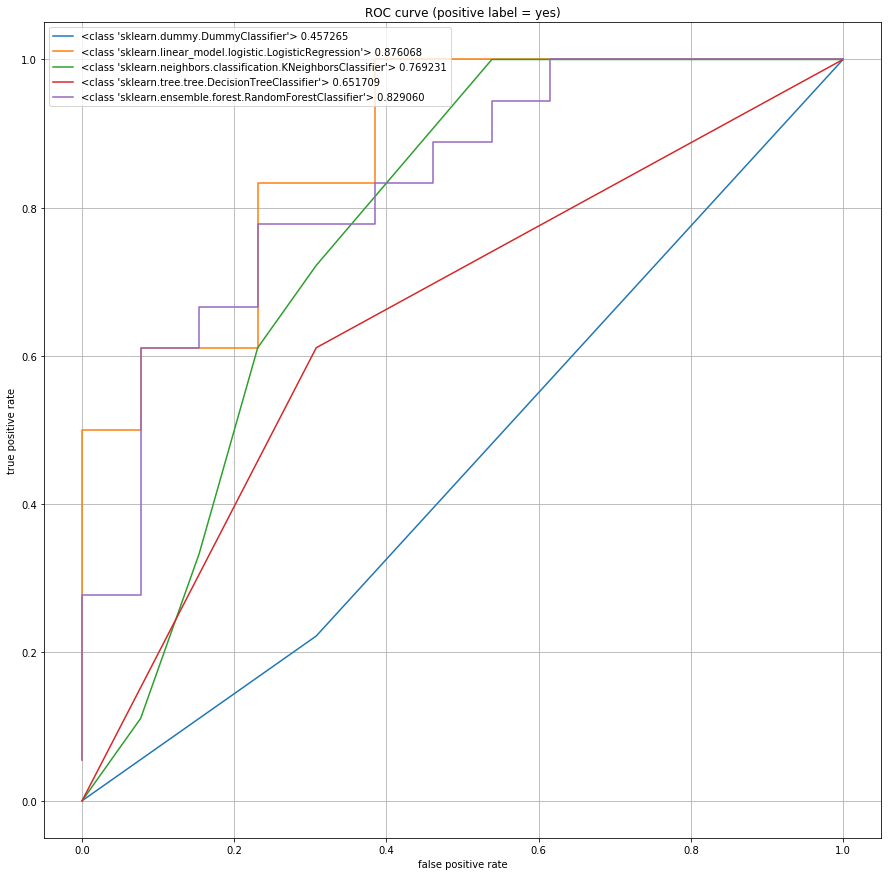

In [32]:
# plot the ROC curve of positive label = 1
from sklearn.metrics import auc, roc_curve

fig, ax = plt.subplots(figsize=(15, 15))

for clf, y_score in zip(classifiers, y_scores):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    ax.plot(fpr, tpr, label='%s %f' % (clf.__class__, auc(fpr, tpr)))

ax.set(title='ROC curve (positive label = yes)',
       xlabel='false positive rate', ylabel='true positive rate')
ax.legend(loc='upper left')
ax.grid()
plt.show()

In [33]:
best_model = classifiers[1]
best_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Predictions

In [34]:
df_predict

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
105,Mexico,Brazil,0,53,13,1,4,8,7,2,...,4,0,0,No,NaN,Round of 16,No,0,NaN,NaN
116,Sweden,England,0,43,7,3,3,1,1,2,...,2,0,0,No,NaN,Quarter Finals,No,0,NaN,NaN
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
104,Brazil,Mexico,2,47,21,10,7,4,8,0,...,2,0,0,Yes,51.0,Round of 16,No,0,NaN,NaN
117,England,Sweden,2,57,12,2,4,6,6,1,...,1,0,0,Yes,30.0,Quarter Finals,No,0,NaN,NaN


In [35]:
# Cleanup
# df_predict.drop('predictions', axis=1, inplace=True)
# df_predict.drop('probability', axis=1, inplace=True)

In [36]:
# preprocess
for c in ['Team', 'Opponent', 'Round', 'PSO']:
    df_predict[c] = encoders[c].transform(df_predict[c])

df_predict['1st Goal'].fillna(-1, inplace=True)
df_predict['Own goals'].fillna(0, inplace=True)
df_predict['Own goal Time'].fillna(-1, inplace=True)

In [37]:
# get the k-best columns
X_predict = df_predict.loc[:, df_predict.columns != 'Man of the Match']
X_predict_kbest = selector.transform(X_predict)
X_predict_scaled = X_scaler.transform(X_predict_kbest)

# predict
encoded_predict = best_model.predict(X_predict_scaled)
predict_probability = best_model.predict_proba(X_predict_scaled)[:, 1]

# interpret
df_predict['predictions'] = encoders['Man of the Match'].inverse_transform(encoded_predict)
df_predict['probability'] = predict_probability

print(df_predict.loc[:, ['Man of the Match', 'predictions', 'probability']])

    Man of the Match predictions  probability
105               No          No     0.121819
116               No          No     0.115876
1                 No          No     0.078383
104              Yes         Yes     0.876924
117              Yes         Yes     0.569474


C:\Users\thang\Anaconda3\envs\mldds02\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Clustering Matches

Objective: find clusters of matches in the dataset

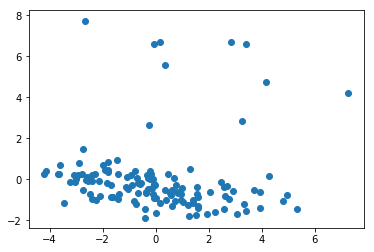

In [40]:
df_cluster = pd.read_csv('D:/tmp/fifa-2018-match-statistics/FIFA 2018 Statistics.csv',
                 parse_dates=['Date'],
                 index_col=0)

# turn into numbers
# skip the Team and Opponent columns as these identify our matches
for c in ['Man of the Match', 'Round', 'PSO']:
    df_cluster[c] = LabelEncoder().fit_transform(df_cluster[c])
    
df_cluster['1st Goal'].fillna(-1, inplace=True)
df_cluster['Own goals'].fillna(0, inplace=True)
df_cluster['Own goal Time'].fillna(-1, inplace=True)

columns = list(df_cluster.columns)
columns.remove('Team')
columns.remove('Opponent')

cluster_scaled = StandardScaler().fit_transform(df_cluster[columns])
cluster_scaled_2d = PCA(n_components=2).fit_transform(cluster_scaled)

fig, ax = plt.subplots()
ax.scatter(cluster_scaled_2d[:, 0], cluster_scaled_2d[:, 1])
plt.show()

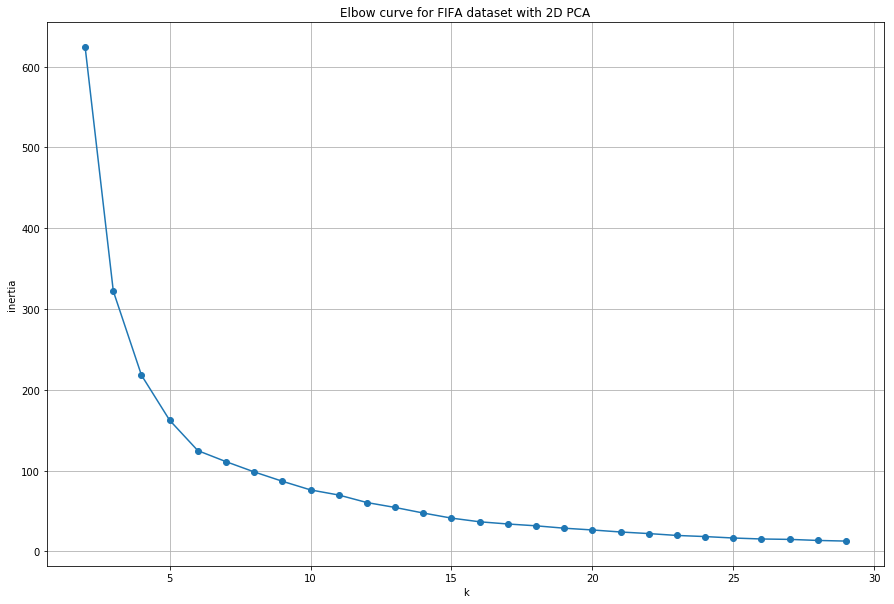

In [43]:
from sklearn.cluster import KMeans

ks = range(2, 30)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_scaled_2d)
    
    # inertia: sum of squared distances of samples
    # to their closest cluster center.
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(ks, inertias, marker='o')
ax.grid()
ax.set(title='Elbow curve for FIFA dataset with 2D PCA',
       xlabel='k', ylabel='inertia')
plt.show()

In [44]:
import numpy as np

def plot_decision_boundaries(ax, title, kmeans_model, data):
    """Plots the decision boundaries for a fitted k-means model
    Args:
        ax: subplot axis
        title: subplot title
        kmeans_model: a fitted sklearn.cluster.KMeans model
        data: 2-dimensional input data to cluster and plot
 
    Based on: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the trained model.
    Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    ax.imshow(Z, interpolation='nearest',
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
              cmap=plt.cm.Pastel2,
              aspect='auto', origin='lower')

    ax.plot(data[:, 0], data[:, 1], 'k.', markersize=4)

    # Plot the centroids as a red X
    centroids = kmeans.cluster_centers_

    ax.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=169, linewidths=3,
               color='red', zorder=10, label='centroids')
    ax.set(title=title,
           xlim=(x_min, x_max), ylim=(y_min, y_max),
           xticks=(), yticks=())
    ax.legend()

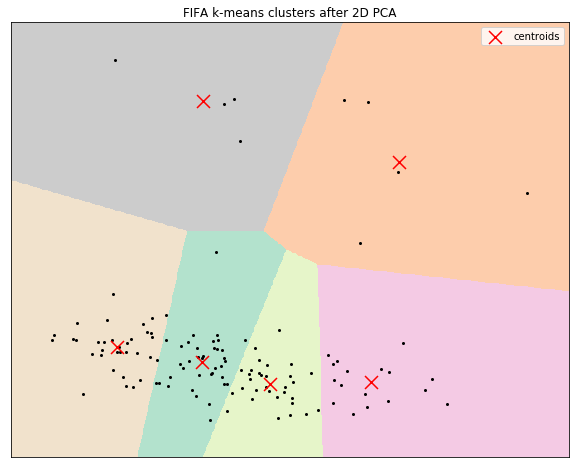

In [46]:
# Get kmeans for k=6

kmeans = KMeans(n_clusters=6)
kmeans.fit(cluster_scaled_2d)

fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_boundaries(ax, 'FIFA k-means clusters after 2D PCA', kmeans, cluster_scaled_2d)

In [47]:
# use DBSCAN to detect outliers

from sklearn.cluster import DBSCAN

# eps : float, optional
#    The maximum distance between two samples for them to be considered
#    as in the same neighborhood.

# min_samples : int, optional
#    The number of samples (or total weight) in a neighborhood for a point
#    to be considered as a core point. This includes the point itself.

db = DBSCAN(eps=0.6, min_samples=5) # these can be tuned
                                    # based on how many clusters
                                    # you want DBSCAN to find

# If we fit using cluster_scaled, we don't get clear clusters
# In that case, clustering on PCA is ok because PCA is also a
# form of feature transformation
db.fit(cluster_scaled_2d)

db.labels_ # -1 means outlier

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
       -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,
       -1, -1,  0, -1, -1,  0,  0,  0,  0], dtype=int64)

In [48]:
# Plot DBSCAN (complicated!)
def plot_dbscan(ax, db, X, title):
    """Plots the clusters found by the DBSCAN algorithm
    Args:
        ax: matplotlib subplot axes
        db: the fitted DBSCAN clusterer
        X: the fitted data
        title: title of the plot    
    """
    import numpy as np
    labels = db.labels_

    # Get an array of zeros with the same shape and type
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    
    # Mark our core samples (used for identifying clusters)
    core_samples_mask[db.core_sample_indices_] = True

    # Plot outliers in black, clusters in colours
    black = [0, 0, 0, 1]

    unique_labels = set(labels)
    
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, color in zip(unique_labels, colors):
        if k == -1: # outliers
            color = black

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
                 markeredgecolor='k', markersize=14)

        # samples that are not core samples
        # black indicates they are outliers
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
                 markeredgecolor='k', markersize=6)

    ax.set(title=title, xticks=(), yticks=())

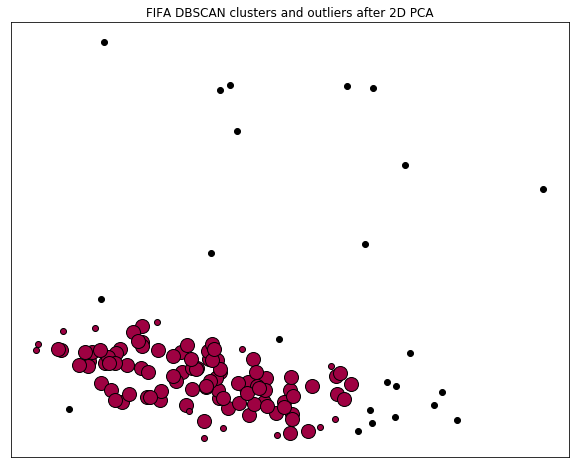

In [244]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_dbscan(ax, db, cluster_scaled_2d, 'FIFA DBSCAN clusters and outliers after 2D PCA')

In [49]:
# print outliers
df_cluster_original = pd.read_csv('D:/tmp/fifa-2018-match-statistics/FIFA 2018 Statistics.csv',
                                  parse_dates=['Date'],
                                  index_col=0)

# print the outliers (boolean indexing!)
outliers = df_cluster_original[db.labels_ == -1]
outliers

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-16,Argentina,Iceland,1,72,26,7,9,10,10,0,...,0,0,0,No,19.0,Group Stage,No,0,NaN,NaN
2018-06-17,Germany,Mexico,0,60,25,9,9,7,8,1,...,2,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN
2018-06-20,Spain,Iran,1,70,17,3,6,8,6,1,...,0,0,0,Yes,54.0,Group Stage,No,0,NaN,NaN
2018-06-22,Brazil,Costa Rica,2,66,23,9,9,5,10,3,...,2,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
2018-06-23,Germany,Sweden,2,71,16,5,4,7,8,5,...,0,1,0,Yes,48.0,Group Stage,No,0,NaN,NaN
2018-06-25,Russia,Uruguay,0,44,3,1,1,1,2,2,...,1,1,0,No,NaN,Group Stage,No,0,1.0,23.0
2018-06-25,Saudi Arabia,Egypt,2,61,22,7,10,5,7,1,...,0,0,0,No,45.0,Group Stage,No,0,NaN,NaN
2018-06-25,Spain,Morocco,2,68,16,4,11,1,7,1,...,0,0,0,Yes,19.0,Group Stage,No,0,NaN,NaN
2018-06-27,Korea Republic,Germany,2,30,11,5,5,1,3,0,...,4,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN


In [50]:
# Another way to visualize: mark outliers and then do a pairplot

df_cluster['outlier'] = 0

# MOAR boolean indexing....
df_cluster.loc[db.labels_ == -1, 'outlier'] = 1

In [51]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2018-06-14 to 2018-07-15
Data columns (total 27 columns):
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-null int64
Man of the Match   

Too many features to do a pair plot, just pick a few that seem important to a match (I don't know soccer very well)

```
    'Ball Possession %',
    'Attempts',
    'On-Target',
    'Off-Target',
    'Blocked',
    'Corners',
    'Offsides',
    'Free Kicks',
    'Saves',
    'Pass Accuracy %',
    'Passes',
    'Distance Covered (Kms)',
    'Fouls Committed',
    'Yellow Card',
    'Red',
    '1st Goal',
    'Man of the Match'
```

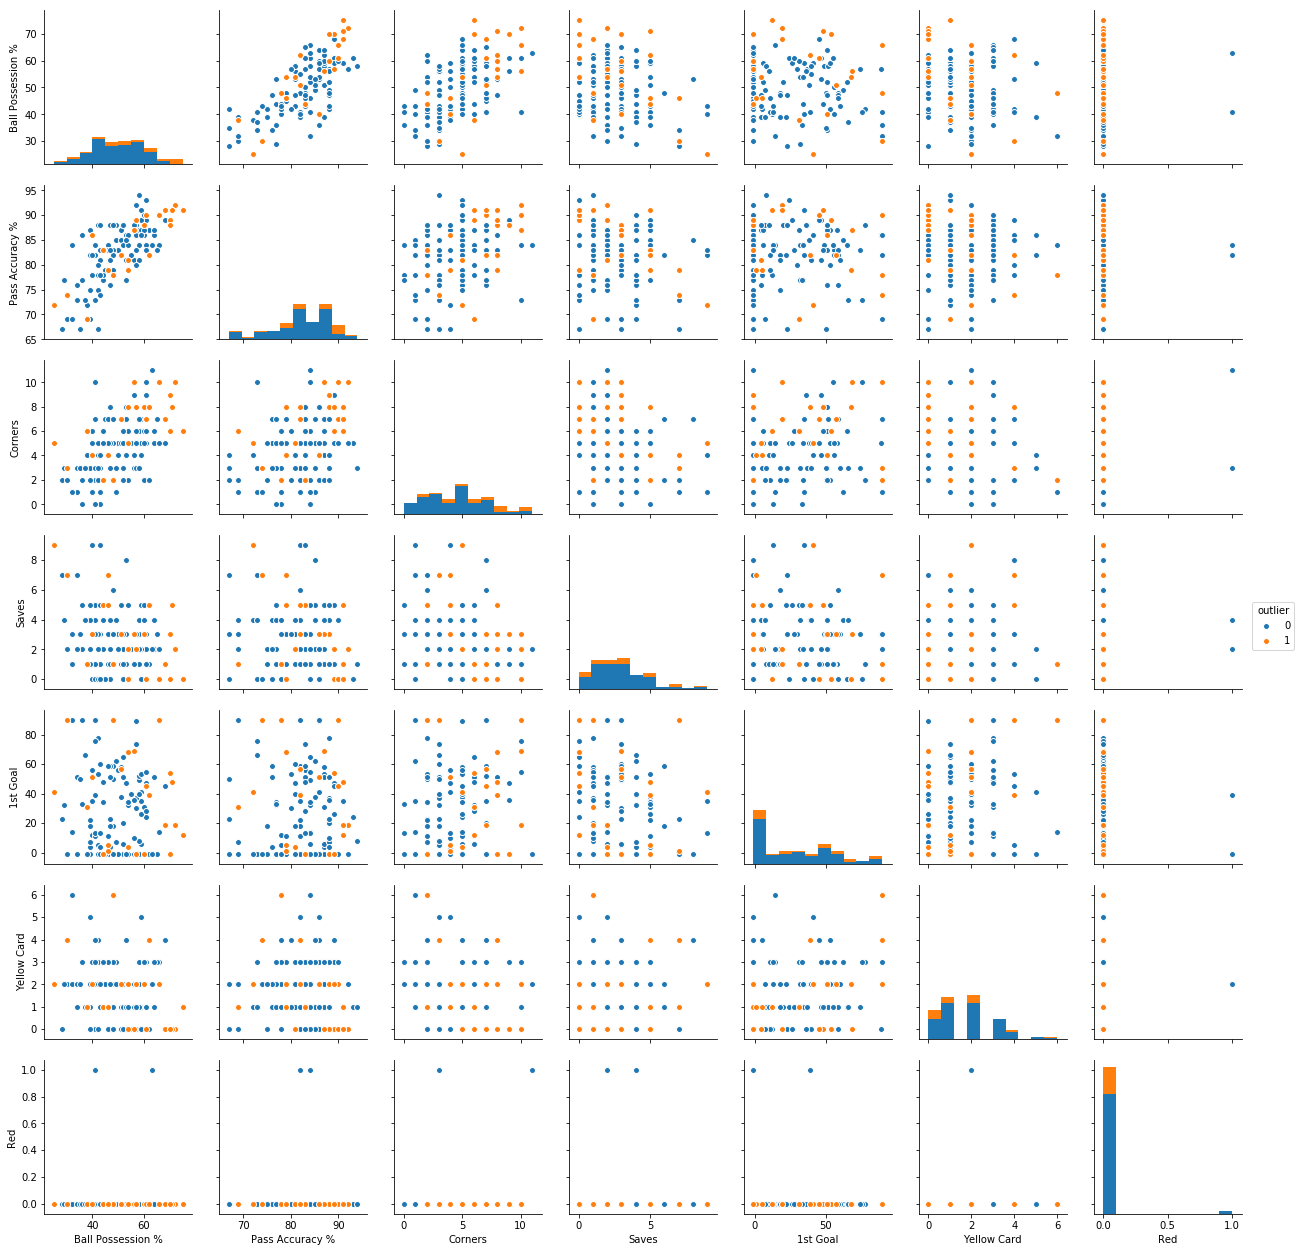

In [249]:
sns.pairplot(df_cluster, hue='outlier',
             vars=['Ball Possession %', 'Pass Accuracy %', 
                  'Corners', 'Saves', '1st Goal', 'Yellow Card', 'Red'])

KMeans without outliers

In [52]:
df_cluster.loc[db.labels_ != -1][columns]

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-14,5,40,13,7,3,3,6,3,11,0,...,0,0,0,1,12.0,2,0,0,0.0,-1.0
2018-06-14,0,60,6,0,3,3,2,1,25,2,...,0,0,0,0,-1.0,2,0,0,0.0,-1.0
2018-06-15,0,43,8,3,3,2,0,1,7,3,...,2,0,0,0,-1.0,2,0,0,0.0,-1.0
2018-06-15,1,57,14,4,6,4,5,1,13,3,...,0,0,0,1,89.0,2,0,0,0.0,-1.0
2018-06-15,0,64,13,3,6,4,5,0,14,2,...,1,0,0,0,-1.0,2,0,0,1.0,90.0
2018-06-15,1,36,8,2,5,1,2,0,22,2,...,3,0,0,1,90.0,2,0,0,0.0,-1.0
2018-06-15,3,39,8,3,2,3,4,1,13,2,...,1,0,0,0,4.0,2,0,0,0.0,-1.0
2018-06-15,3,61,12,5,5,2,5,3,13,0,...,1,0,0,1,24.0,2,0,0,0.0,-1.0
2018-06-16,2,51,12,5,4,3,5,0,19,1,...,1,0,0,1,58.0,2,0,0,0.0,-1.0


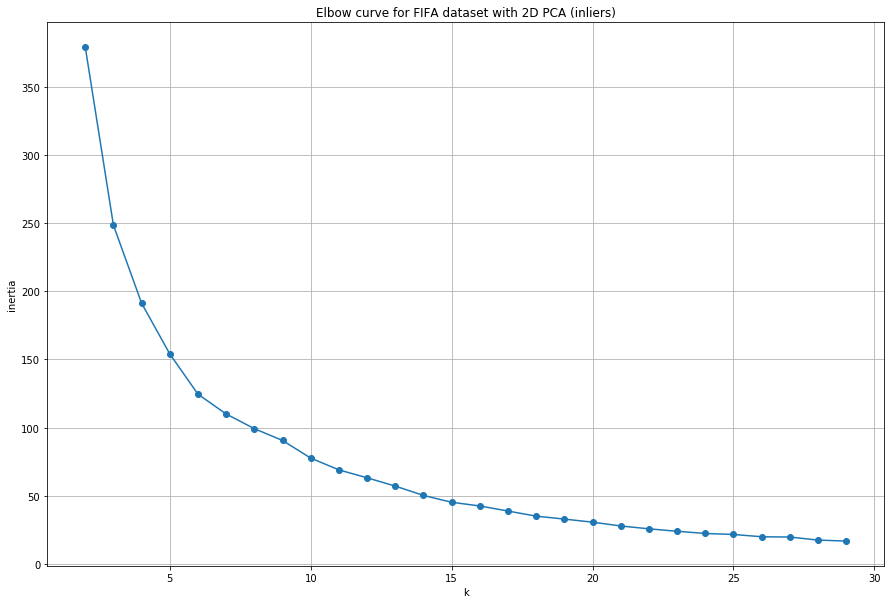

In [254]:
inliers = df_cluster.loc[db.labels_ != -1, columns]

inliers_scaled_2d = PCA(n_components=2).fit_transform(
    StandardScaler().fit_transform(inliers))

ks = range(2, 30)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(inliers_scaled_2d)
    
    # inertia: sum of squared distances of samples
    # to their closest cluster center.
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(ks, inertias, marker='o')
ax.grid()
ax.set(title='Elbow curve for FIFA dataset with 2D PCA (inliers)',
       xlabel='k', ylabel='inertia')
plt.show()

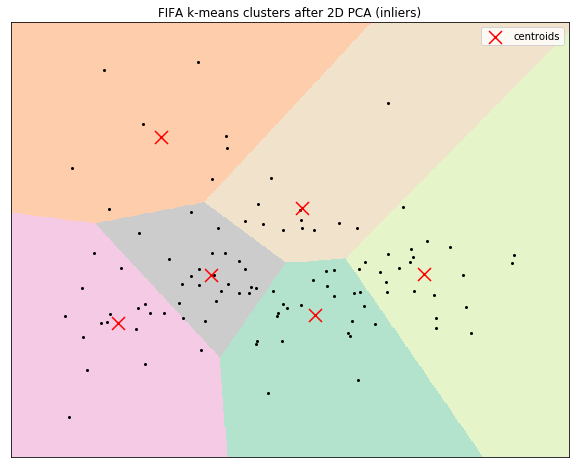

In [263]:
# Get kmeans for k=6

kmeans = KMeans(n_clusters=6)
kmeans.fit(inliers_scaled_2d)

fig, ax = plt.subplots(figsize=(10, 8))
plot_decision_boundaries(ax, 'FIFA k-means clusters after 2D PCA (inliers)', kmeans, inliers_scaled_2d)

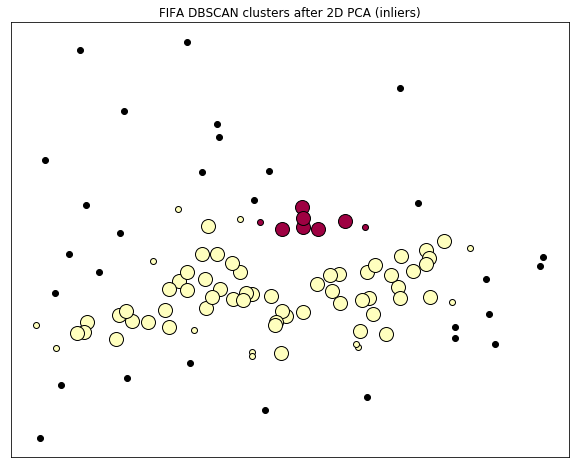

In [288]:
db2 = DBSCAN(eps=0.7, min_samples=5) # these can be tuned
                                    # based on how many clusters
                                    # you want DBSCAN to find

db2.fit(inliers_scaled_2d)

fig, ax = plt.subplots(figsize=(10, 8))
plot_dbscan(ax, db2, inliers_scaled_2d, 'FIFA DBSCAN clusters after 2D PCA (inliers)')

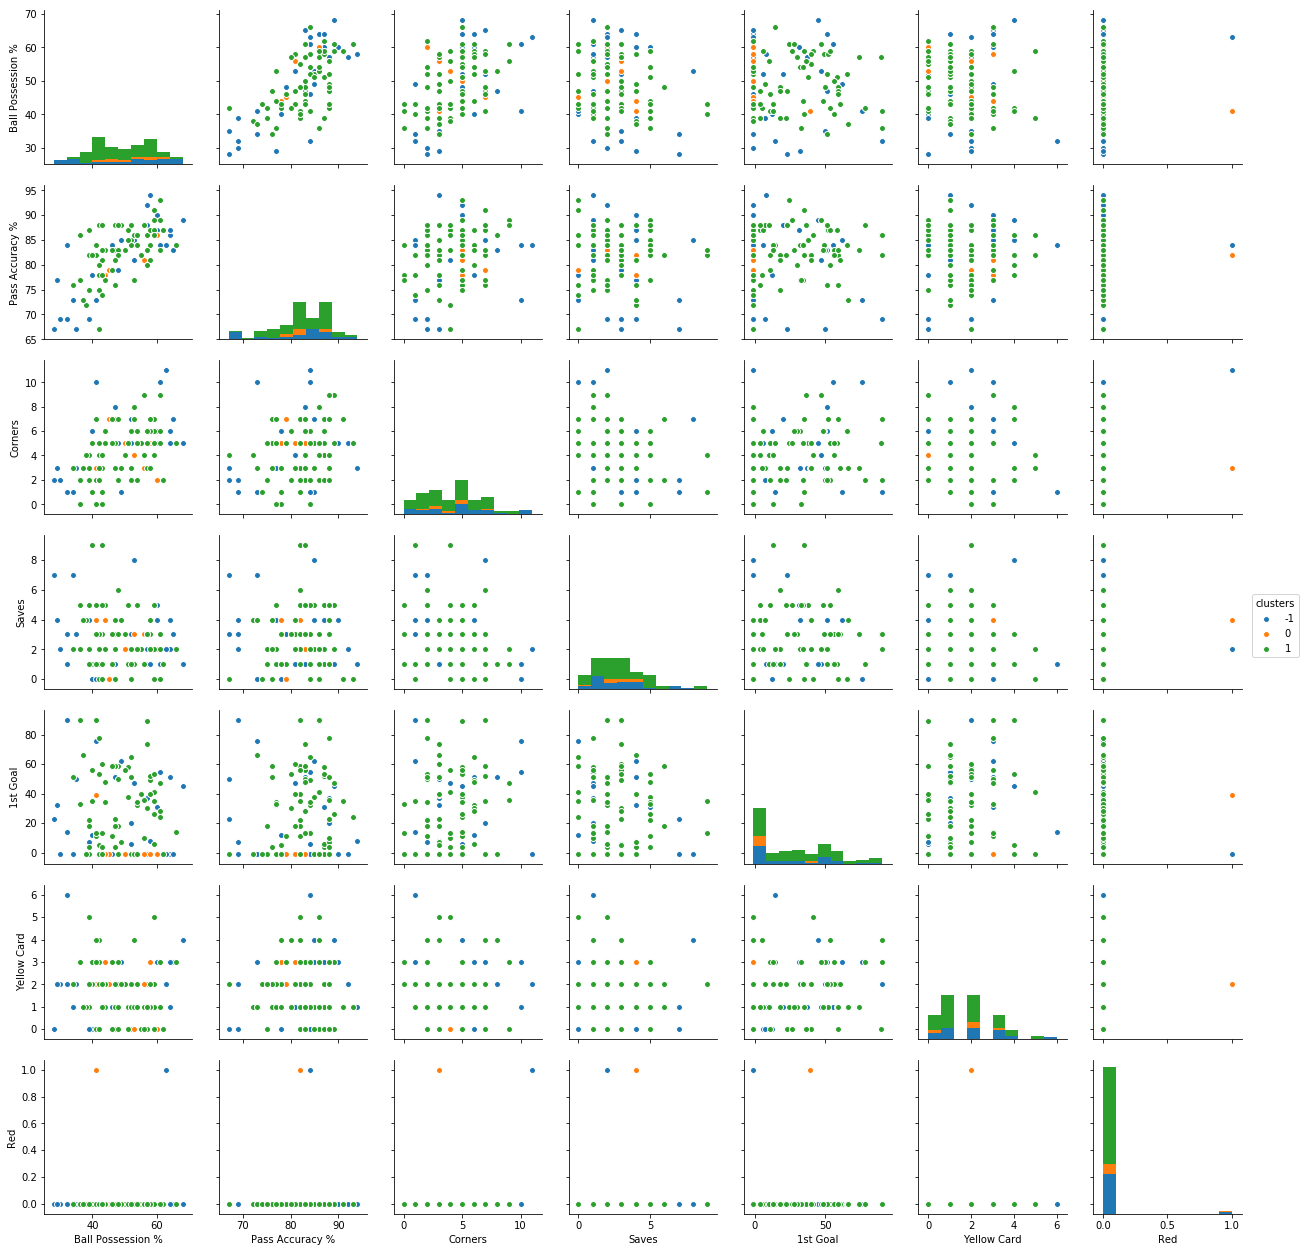

In [289]:
# pairplot the new clusters

columns2 = ['Ball Possession %', 'Pass Accuracy %', 
            'Corners', 'Saves', '1st Goal', 'Yellow Card', 'Red']

inliers['clusters'] = db2.labels_

sns.pairplot(inliers, hue='clusters', vars=columns2)